# Import Required Libraries
Import necessary libraries including pandas, numpy, matplotlib, seaborn, and datetime for data manipulation and visualization.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seaborn style for the plots
sns.set(style="whitegrid")

# Load and Examine the Dataset
Load the NVDA.csv file using pandas and examine its structure, including data types, missing values, and first few rows.

In [2]:
# Load and Examine the Dataset

# Load the NVDA.csv file into a DataFrame
nvda_df = pd.read_csv('NVDA.csv')

# Display the first few rows of the DataFrame
nvda_df.head()

# Display the summary information of the DataFrame, including data types and missing values
nvda_df.info()

# Display the summary statistics of the DataFrame
nvda_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6560 non-null   object 
 1   Open    6560 non-null   float64
 2   High    6560 non-null   float64
 3   Low     6560 non-null   float64
 4   Close   6560 non-null   float64
 5   Volume  6560 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 307.6+ KB


Open         High          Low        Close        Volume
count  6560.000000  6560.000000  6560.000000  6560.000000  6.560000e+03
mean      8.809059     8.969813     8.631269     8.808332  5.989866e+08
std      24.031512    24.459548    23.525934    24.011981  4.307164e+08
min       0.032003     0.032600     0.030569     0.031286  1.968000e+07
25%       0.257637     0.264608     0.250727     0.257816  3.382680e+08
50%       0.437182     0.443633     0.430589     0.437284  5.002530e+08
75%       4.593818     4.690310     4.560784     4.605983  7.306628e+08
max     153.029999   153.130005   147.820007   149.429993  9.230856e+09

# Data Cleaning and Preprocessing
Handle missing values, convert date columns to datetime format, and prepare the data for analysis.

In [3]:
# Data Cleaning and Preprocessing

# Handle missing values by filling them with the previous value in the column
nvda_df.fillna(method='ffill', inplace=True)

# Convert the 'Date' column to datetime format
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])

# Set the 'Date' column as the index of the DataFrame
nvda_df.set_index('Date', inplace=True)

# Display the first few rows of the cleaned DataFrame
nvda_df.head()

# Display the summary information of the cleaned DataFrame
nvda_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6560 entries, 1999-01-22 to 2025-02-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6560 non-null   float64
 1   High    6560 non-null   float64
 2   Low     6560 non-null   float64
 3   Close   6560 non-null   float64
 4   Volume  6560 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 307.5 KB


C:\Users\EverGarden13\AppData\Local\Temp\ipykernel_14184\1752168259.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_df.fillna(method='ffill', inplace=True)


# Statistical Summary and Analysis
Generate descriptive statistics and analyze basic metrics like mean, median, min, max of stock prices and trading volumes.

In [4]:
# Statistical Summary and Analysis

# Generate descriptive statistics for the stock prices and trading volumes
nvda_stats = nvda_df.describe()

# Display the descriptive statistics
nvda_stats

# Calculate and display additional metrics: mean, median, min, max for 'Close' prices and 'Volume'
mean_close = nvda_df['Close'].mean()
median_close = nvda_df['Close'].median()
min_close = nvda_df['Close'].min()
max_close = nvda_df['Close'].max()

mean_volume = nvda_df['Volume'].mean()
median_volume = nvda_df['Volume'].median()
min_volume = nvda_df['Volume'].min()
max_volume = nvda_df['Volume'].max()

# Print the calculated metrics
print(f"Mean Close Price: {mean_close}")
print(f"Median Close Price: {median_close}")
print(f"Min Close Price: {min_close}")
print(f"Max Close Price: {max_close}")

print(f"Mean Volume: {mean_volume}")
print(f"Median Volume: {median_volume}")
print(f"Min Volume: {min_volume}")
print(f"Max Volume: {max_volume}")

Mean Close Price: 8.808332252705743
Median Close Price: 0.43728411197662354
Min Close Price: 0.0312863551080226
Max Close Price: 149.42999267578125
Mean Volume: 598986632.6981708
Median Volume: 500253000.0
Min Volume: 19680000
Max Volume: 9230856000


# Time Series Analysis
Analyze NVDA stock performance over time using time series plots with seaborn and matplotlib.

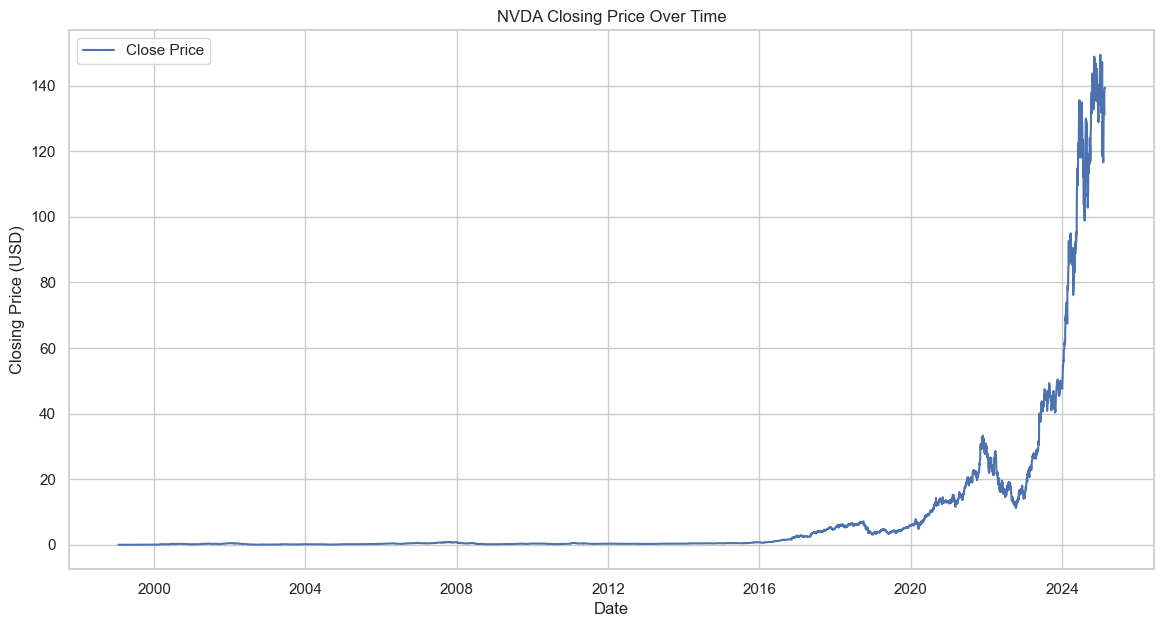

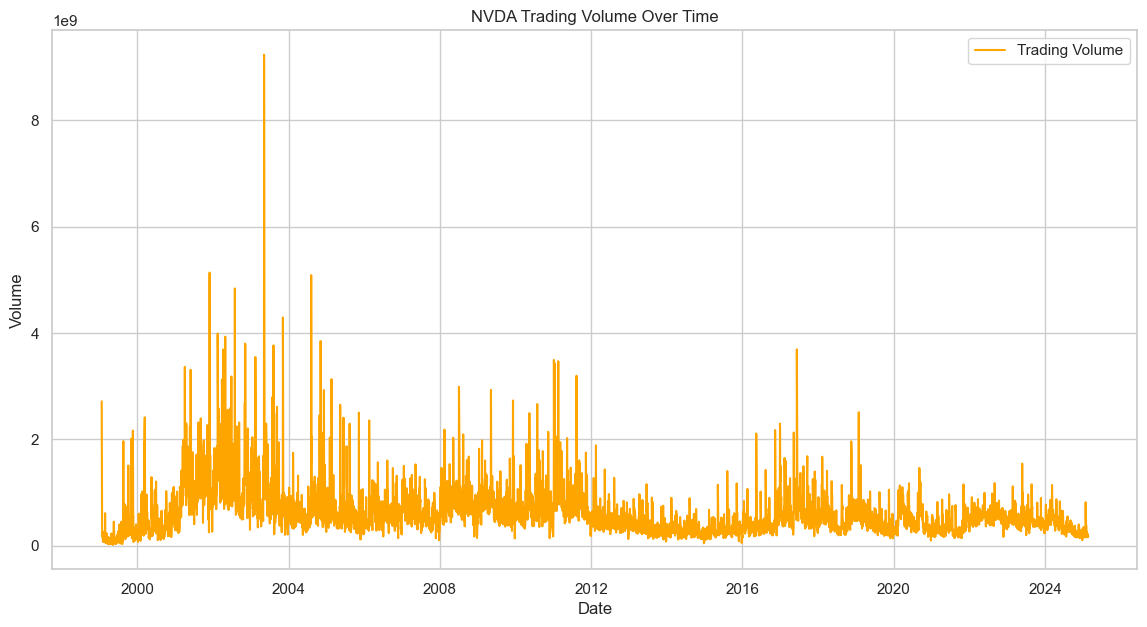

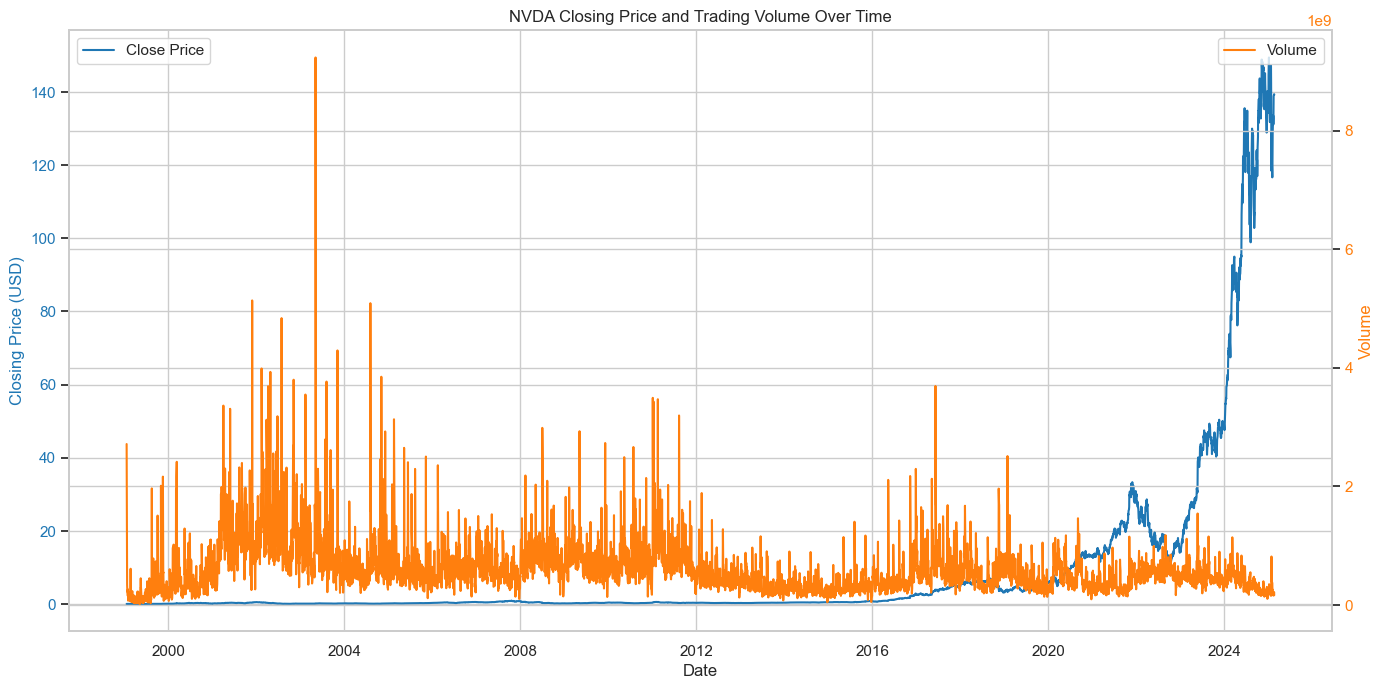

In [5]:
# Time Series Analysis

# Plot the closing price over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Close', label='Close Price')
plt.title('NVDA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.savefig('plots/EDA/nvda_closing_price_over_time.png')
plt.show()

# Plot the trading volume over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Volume', label='Trading Volume', color='orange')
plt.title('NVDA Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.savefig('plots/EDA/nvda_trading_volume_over_time.png')
plt.show()

# Plot both closing price and volume on the same plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)', color=color)
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Close', ax=ax1, color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Volume', color=color)
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Volume', ax=ax2, color=color, label='Volume')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('NVDA Closing Price and Trading Volume Over Time')
plt.savefig('plots/EDA/nvda_closing_price_and_trading_volume_over_time.png')
plt.show()

# Price Distribution Visualization
Create distribution plots for opening, closing, high and low prices using seaborn histograms and KDE plots.

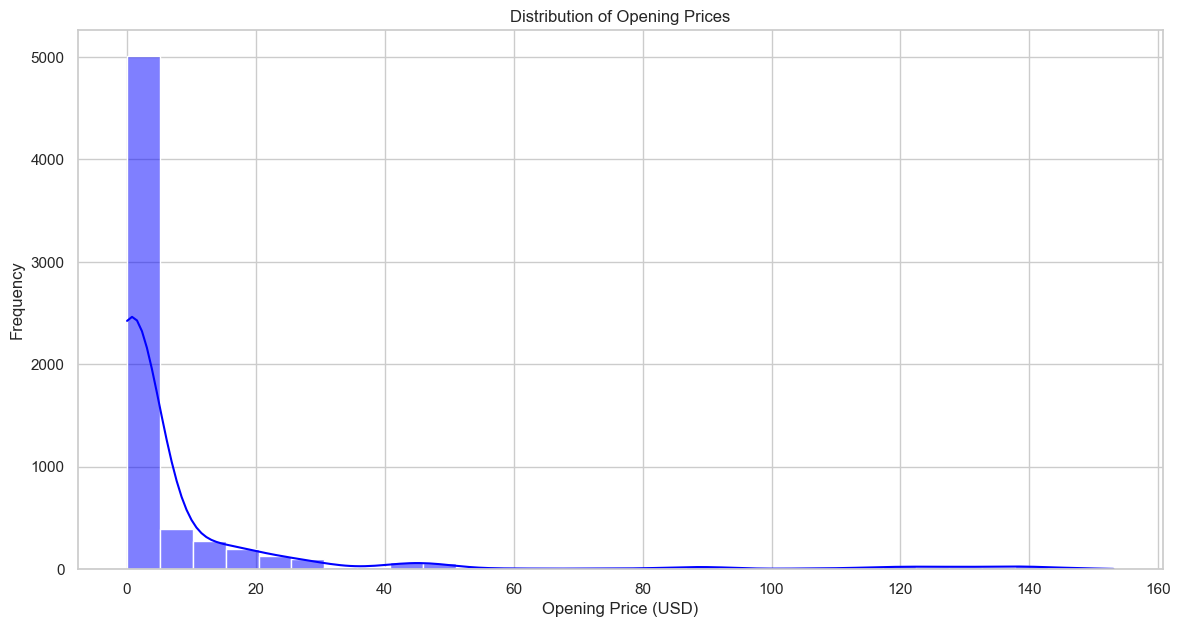

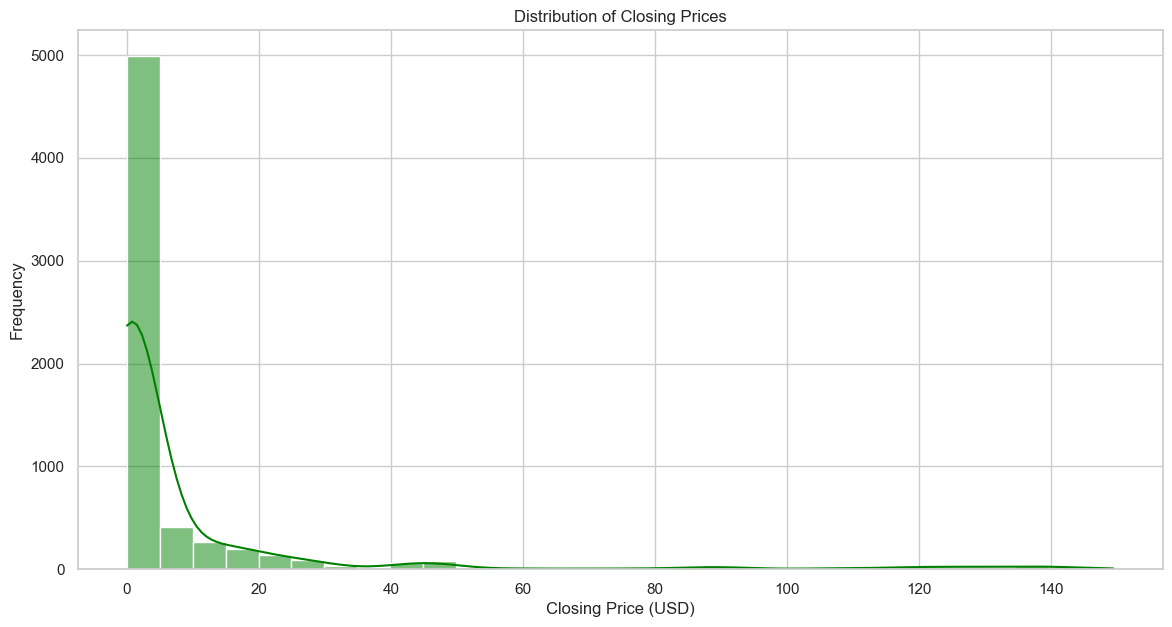

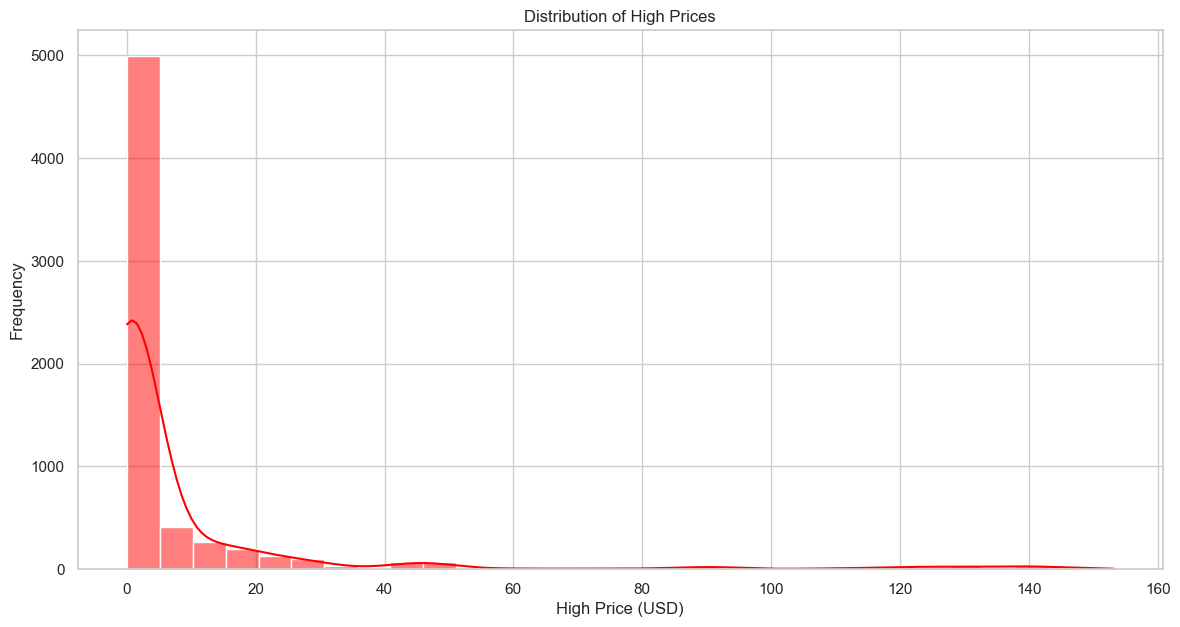

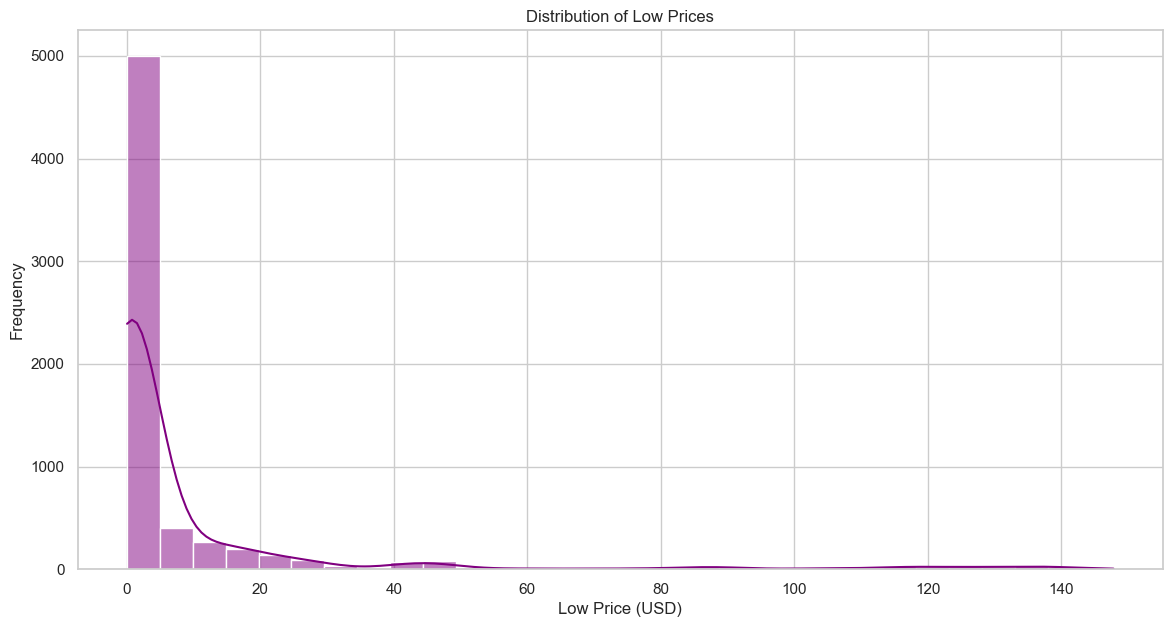

In [6]:
# Price Distribution Visualization

# Create a distribution plot for the opening prices
plt.figure(figsize=(14, 7))
sns.histplot(nvda_df['Open'], kde=True, bins=30, color='blue')
plt.title('Distribution of Opening Prices')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Frequency')
plt.savefig('plots/EDA/distribution_of_opening_prices.png')
plt.show()

# Create a distribution plot for the closing prices
plt.figure(figsize=(14, 7))
sns.histplot(nvda_df['Close'], kde=True, bins=30, color='green')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.savefig('plots/EDA/distribution_of_closing_prices.png')
plt.show()

# Create a distribution plot for the high prices
plt.figure(figsize=(14, 7))
sns.histplot(nvda_df['High'], kde=True, bins=30, color='red')
plt.title('Distribution of High Prices')
plt.xlabel('High Price (USD)')
plt.ylabel('Frequency')
plt.savefig('plots/EDA/distribution_of_high_prices.png')
plt.show()

# Create a distribution plot for the low prices
plt.figure(figsize=(14, 7))
sns.histplot(nvda_df['Low'], kde=True, bins=30, color='purple')
plt.title('Distribution of Low Prices')
plt.xlabel('Low Price (USD)')
plt.ylabel('Frequency')
plt.savefig('plots/EDA/distribution_of_low_prices.png')
plt.show()

# Correlation Analysis
Visualize correlations between different variables using seaborn heatmaps and pairplots.

            Open      High       Low     Close    Volume
Open    1.000000  0.999882  0.999799  0.999617 -0.164911
High    0.999882  1.000000  0.999805  0.999801 -0.164254
Low     0.999799  0.999805  1.000000  0.999862 -0.165991
Close   0.999617  0.999801  0.999862  1.000000 -0.165234
Volume -0.164911 -0.164254 -0.165991 -0.165234  1.000000


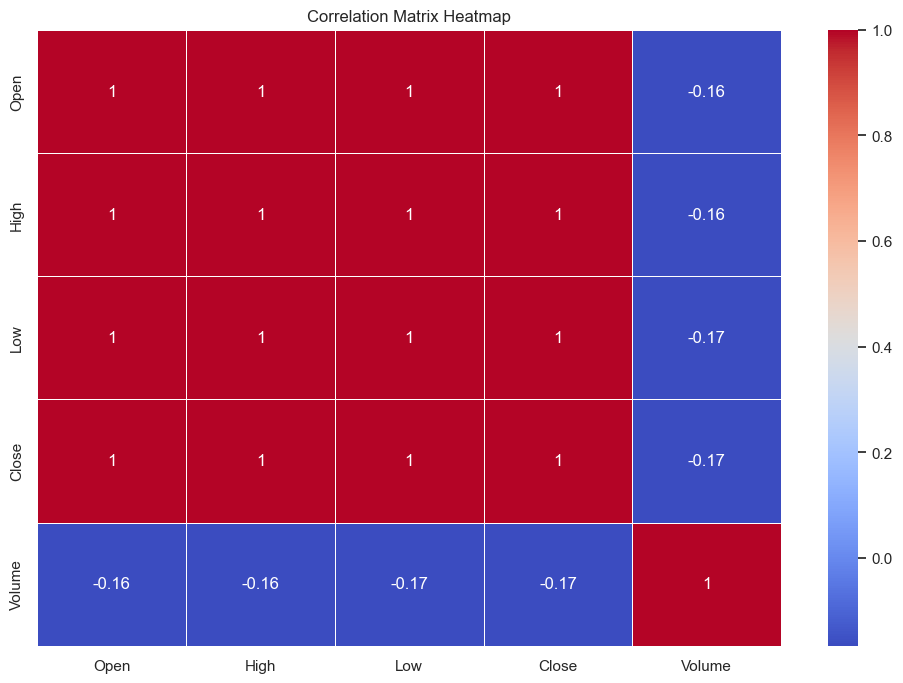

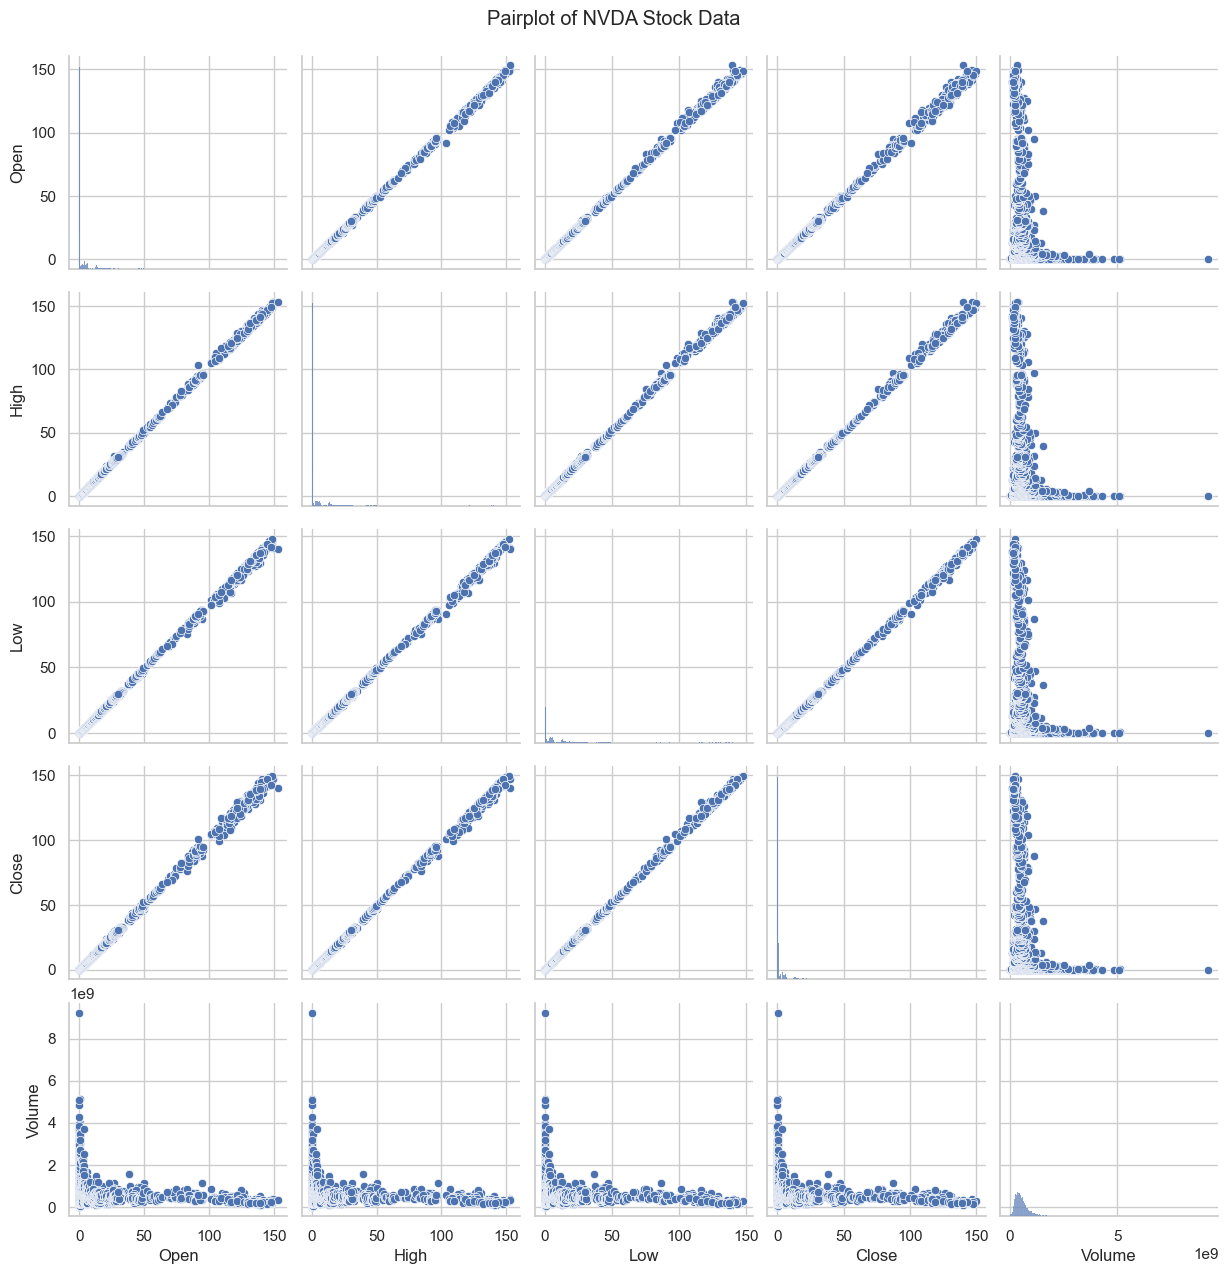

In [7]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = nvda_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('plots/EDA/correlation_matrix_heatmap.png')
plt.show()

# Create pairplots to visualize relationships between variables
sns.pairplot(nvda_df)
plt.suptitle('Pairplot of NVDA Stock Data', y=1.02)
plt.savefig('plots/EDA/pairplot_nvda_stock_data.png')
plt.show()

# Trading Volume Analysis
Analyze and visualize trading volumes over time with bar charts and moving averages.

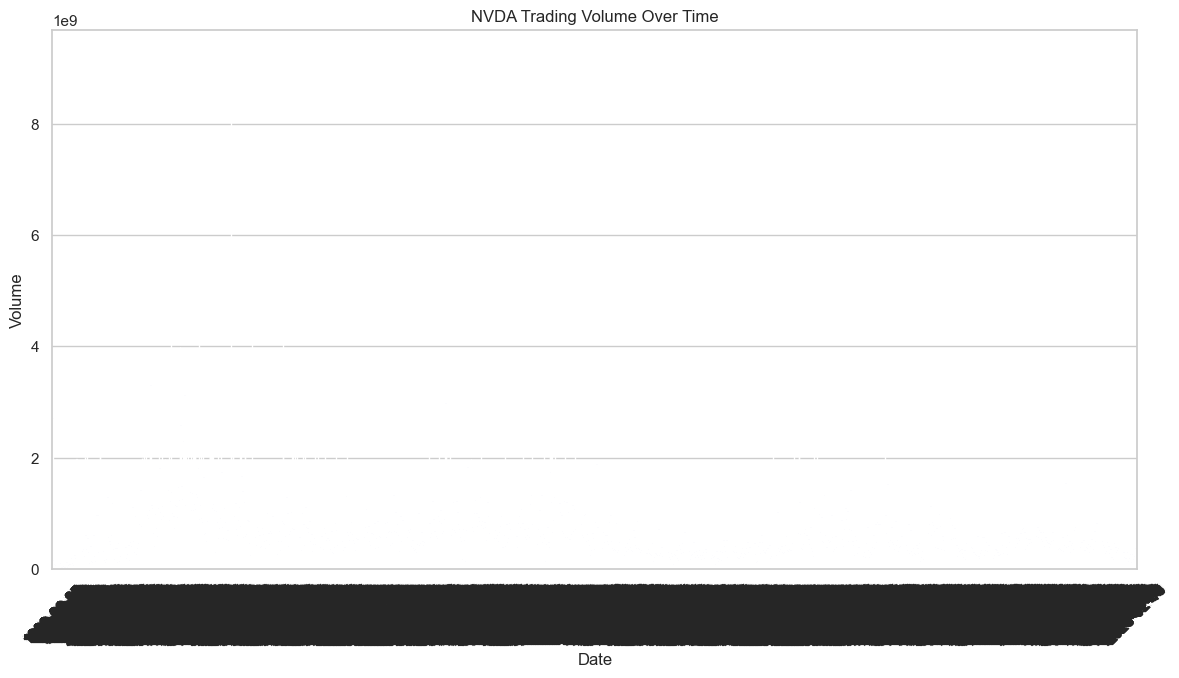

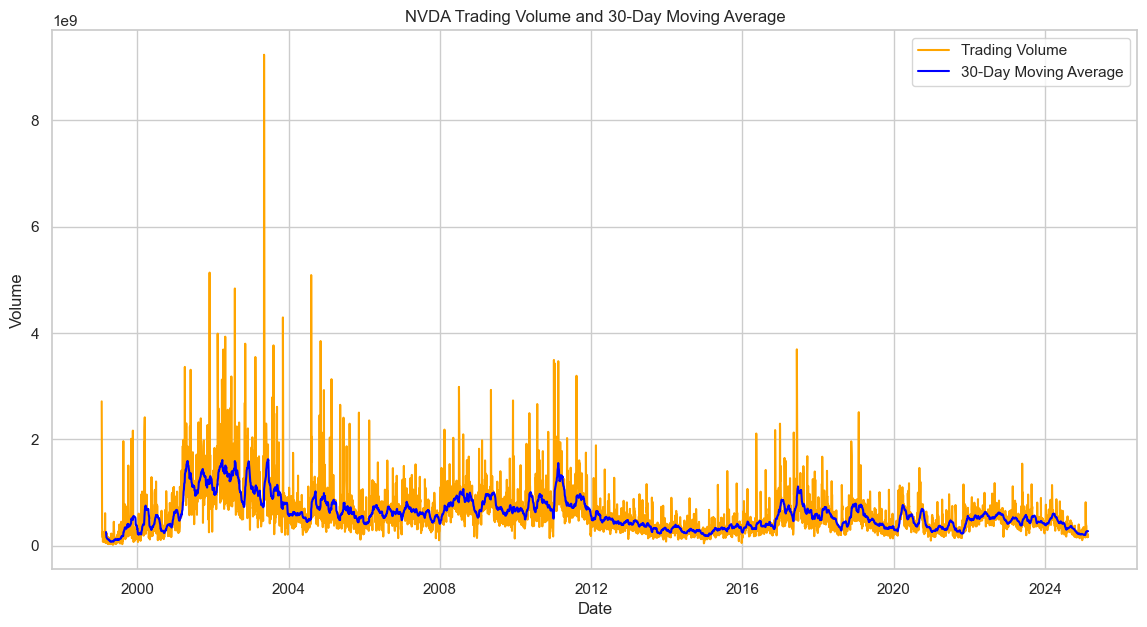

In [8]:
# Trading Volume Analysis

# Plot the trading volume over time with a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x=nvda_df.index, y='Volume', data=nvda_df, color='blue')
plt.title('NVDA Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.savefig('plots/EDA/nvda_trading_volume_over_time_bar.png')
plt.show()

# Calculate the 30-day moving average of the trading volume
nvda_df['Volume_MA30'] = nvda_df['Volume'].rolling(window=30).mean()

# Plot the trading volume and its 30-day moving average
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Volume', label='Trading Volume', color='orange')
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Volume_MA30', label='30-Day Moving Average', color='blue')
plt.title('NVDA Trading Volume and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.savefig('plots/EDA/nvda_trading_volume_and_moving_average.png')
plt.show()

# Moving Averages and Trend Analysis
Calculate and plot various moving averages to identify trends in the stock price.

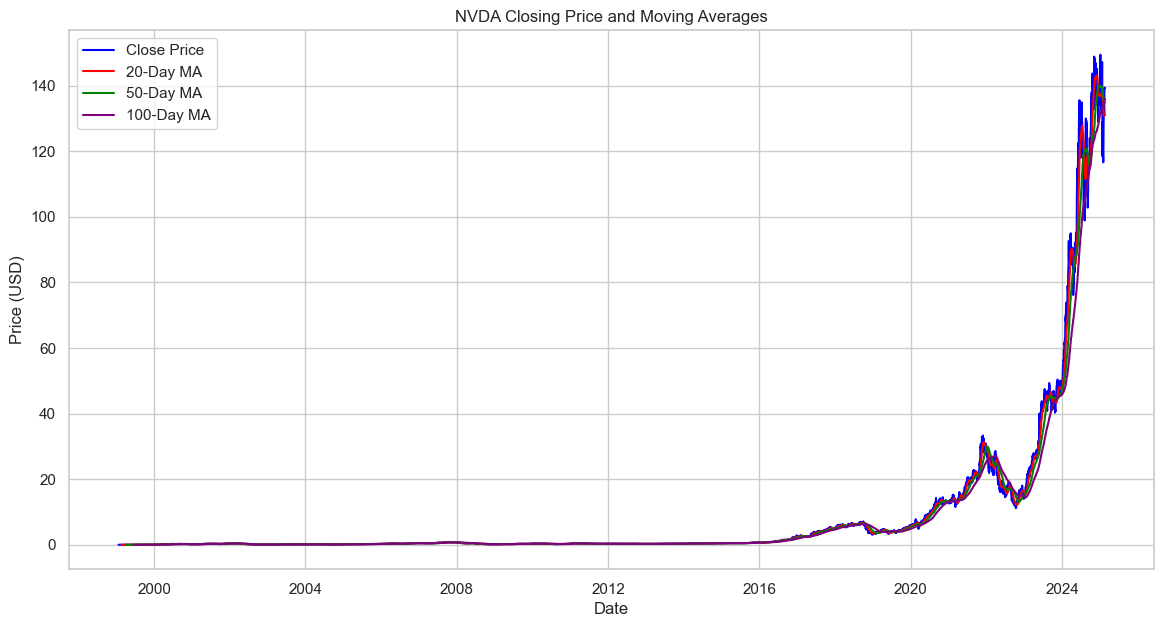

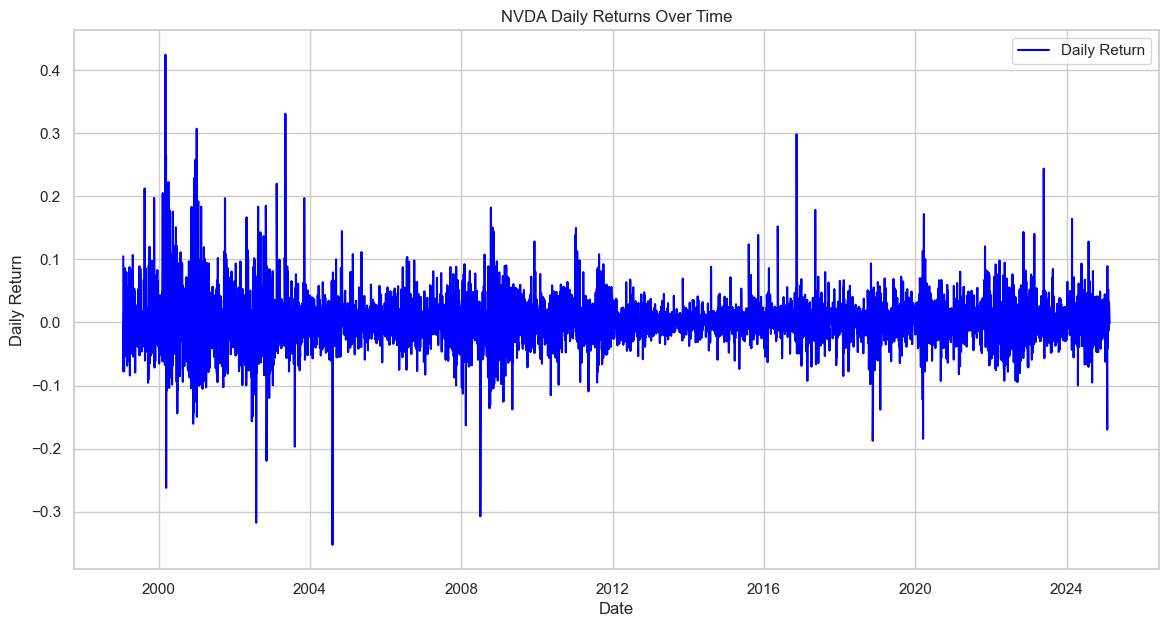

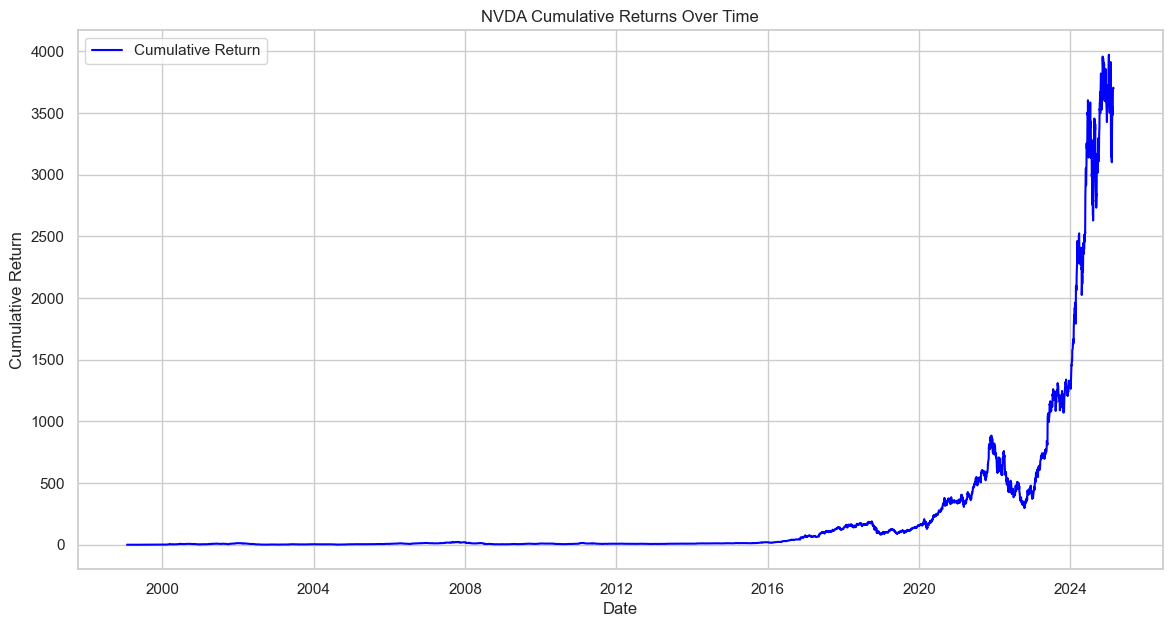

In [9]:
# Moving Averages and Trend Analysis

# Calculate the 20-day moving average of the closing price
nvda_df['MA20'] = nvda_df['Close'].rolling(window=20).mean()

# Calculate the 50-day moving average of the closing price
nvda_df['MA50'] = nvda_df['Close'].rolling(window=50).mean()

# Calculate the 100-day moving average of the closing price
nvda_df['MA100'] = nvda_df['Close'].rolling(window=100).mean()

# Plot the closing price along with its moving averages
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Close', label='Close Price', color='blue')
sns.lineplot(data=nvda_df, x=nvda_df.index, y='MA20', label='20-Day MA', color='red')
sns.lineplot(data=nvda_df, x=nvda_df.index, y='MA50', label='50-Day MA', color='green')
sns.lineplot(data=nvda_df, x=nvda_df.index, y='MA100', label='100-Day MA', color='purple')
plt.title('NVDA Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('plots/EDA/nvda_closing_price_and_moving_averages.png')
plt.show()

# Calculate the daily returns
nvda_df['Daily_Return'] = nvda_df['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Daily_Return', label='Daily Return', color='blue')
plt.title('NVDA Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.savefig('plots/EDA/nvda_daily_returns_over_time.png')
plt.show()

# Calculate the cumulative returns
nvda_df['Cumulative_Return'] = (1 + nvda_df['Daily_Return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_df, x=nvda_df.index, y='Cumulative_Return', label='Cumulative Return', color='blue')
plt.title('NVDA Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.savefig('plots/EDA/nvda_cumulative_returns_over_time.png')
plt.show()

# Interactive Stock Charts
Create interactive visualizations for deeper analysis of stock patterns and anomalies.

In [10]:
# Interactive Stock Charts

import plotly.express as px
import plotly.graph_objects as go

# Create an interactive line chart for the closing price
fig = px.line(nvda_df, x=nvda_df.index, y='Close', title='NVDA Closing Price Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Closing Price (USD)')
fig.show()

# Create an interactive line chart for the trading volume
fig = px.line(nvda_df, x=nvda_df.index, y='Volume', title='NVDA Trading Volume Over Time', color_discrete_sequence=['orange'])
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Volume')
fig.show()

# Create an interactive chart with both closing price and volume on the same plot with two y-axes
fig = go.Figure()

fig.add_trace(go.Scatter(x=nvda_df.index, y=nvda_df['Close'], mode='lines', name='Close Price', yaxis='y1'))
fig.add_trace(go.Scatter(x=nvda_df.index, y=nvda_df['Volume'], mode='lines', name='Volume', yaxis='y2', line=dict(color='orange')))

fig.update_layout(
    title='NVDA Closing Price and Trading Volume Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Closing Price (USD)', side='left'),
    yaxis2=dict(title='Volume', side='right', overlaying='y')
)

fig.show()

# Create an interactive histogram for the closing prices
fig = px.histogram(nvda_df, x='Close', nbins=30, title='Distribution of Closing Prices', marginal='box', color_discrete_sequence=['green'])
fig.update_xaxes(title_text='Closing Price (USD)')
fig.update_yaxes(title_text='Frequency')
fig.show()

# Create an interactive scatter plot matrix to visualize relationships between variables
fig = px.scatter_matrix(nvda_df, dimensions=['Open', 'High', 'Low', 'Close', 'Volume'], title='Scatter Matrix of NVDA Stock Data')
fig.update_layout(width=1000, height=1000)
fig.show()